## localized investigation of the Inland Empire (Riverside and San Bernardino counties)

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_column', 200)
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
gdf = gpd.read_file('clean_data/master.shp')

In [3]:
counties = gpd.read_file("raw_data/cnty19_1.shp")

In [4]:
gdf.columns

Index(['index', 'OBJECTID', 'Year', 'FedID', 'CDCode', 'CDSCode', 'CountyName',
       'DistrictNa', 'DistrictTy', 'GradeLow',
       ...
       'm_prio_FOS', 'm_prio_HI', 'm_prio_HOM', 'm_prio_MR', 'm_prio_PI',
       'm_prio_RFP', 'm_prio_SED', 'm_prio_SWD', 'm_prio_WH', 'geometry'],
      dtype='object', length=182)

In [5]:
counties.columns

Index(['OBJECTID', 'COUNTY_NAM', 'COUNTY_ABB', 'COUNTY_NUM', 'COUNTY_COD',
       'COUNTY_FIP', 'ISLAND', 'GlobalID', 'SHAPE_Leng', 'SHAPE_Area',
       'geometry'],
      dtype='object')

In [6]:
study_area = ['Riverside', 'San Bernardino']
# set counties to `study_area` variable
ie = gdf.loc[gdf['CountyName'].isin(study_area)]
# create new dataframe with districts in counties from `study_area` variable
iec = counties.loc[counties['COUNTY_NAM'].isin(study_area)]
# create new dataframe with county boundaries from `study_area` varriable

In [7]:
ie.head()

,index,OBJECTID,Year,FedID,CDCode,CDSCode,CountyName,DistrictNa,DistrictTy,GradeLow,GradeHigh,GradeLowCe,GradeHighC,AssistStat,CongressUS,SenateCA,AssemblyCA,LocaleDist,UpdateNote,EnrollTota,EnrollChar,EnrollNonC,AAcount,AApct,AIcount,AIpct,AScount,ASpct,FIcount,FIpct,HIcount,HIpct,MRcount,MRpct,PIcount,PIpct,WHcount,WHpct,NRcount,NRpct,ELcount,ELpct,FOScount,FOSpct,HOMcount,HOMpct,MIGcount,MIGpct,SWDcount,SWDpct,SEDcount,SEDpct,UPcount,UPpct,ELATested,ELAStdMetP,MathTested,MathStdMet,CCPrepCoho,CCPrepPct,AbsentElig,AbsentPct,GradCohort,GradPct,UCCSUReqMe,DropOutPct,EnrollCumu,SuspPct,SHAPE_Leng,SHAPE_Area,Unnamed__0,district_1,unduplicat,base_grant,supplement,concentrat,total_gran,cds,District_C,e_chan_AA,e_chan_AI,e_chan_ALL,e_chan_AS,e_chan_EL,e_chan_ELO,e_chan_EO,e_chan_FI,e_chan_FOS,e_chan_HI,e_chan_HOM,e_chan_MR,e_chan_PI,e_chan_RFP,e_chan_SED,e_chan_SWD,e_chan_WH,e_curr_AA,e_curr_AI,e_curr_ALL,e_curr_AS,e_curr_EL,e_curr_ELO,e_curr_EO,e_curr_FI,e_curr_FOS,e_curr_HI,e_curr_HOM,e_curr_MR,e_curr_PI,e_curr_RFP,e_curr_SED,e_curr_SWD,e_curr_WH,e_prio_AA,e_prio_AI,e_prio_ALL,e_prio_AS,e_prio_EL,e_prio_ELO,e_prio_EO,e_prio_FI,e_prio_FOS,e_prio_HI,e_prio_HOM,e_prio_MR,e_prio_PI,e_prio_RFP,e_prio_SED,e_prio_SWD,e_prio_WH,m_chan_AA,m_chan_AI,m_chan_ALL,m_chan_AS,m_chan_EL,m_chan_ELO,m_chan_EO,m_chan_FI,m_chan_FOS,m_chan_HI,m_chan_HOM,m_chan_MR,m_chan_PI,m_chan_RFP,m_chan_SED,m_chan_SWD,m_chan_WH,m_curr_AA,m_curr_AI,m_curr_ALL,m_curr_AS,m_curr_EL,m_curr_ELO,m_curr_EO,m_curr_FI,m_curr_FOS,m_curr_HI,m_curr_HOM,m_curr_MR,m_curr_PI,m_curr_RFP,m_curr_SED,m_curr_SWD,m_curr_WH,m_prio_AA,m_prio_AI,m_prio_ALL,m_prio_AS,m_prio_EL,m_prio_ELO,m_prio_EO,m_prio_FI,m_prio_FOS,m_prio_HI,m_prio_HOM,m_prio_MR,m_prio_PI,m_prio_RFP,m_prio_SED,m_prio_SWD,m_prio_WH,geometry
472,391.0,473,2018-19,0602430,3366977,33669770000000,Riverside,Alvord Unified,Unified,KG,12,KG,12,General Assistance,"41,42","28,31","60,67","11 - City, Large",2018-19 District Boundary Adjustment/Correction,18504,0,18504,697,3.8,49,0.3,680,3.7,274,1.5,14698,79.400002,238,1.3,78,0.4,1772,9.600000,18,0.1,6425,34.700001,92,0.5,572,3.1,0,0.0,2135,11.5,14679,79.300003,14926,0.810,9689.0,42.200001,9744.0,27.799999,1509.0,31.799999,19346.0,13.0,1525.0,91.699997,37.000000,4.7,19989.0,2.6,65186.551516,1.195834e+08,1167,Alvord Unified,0.8107,"151,746,883","24,604,240","19,780,205","198,102,495",3.366977e+13,66977,-2.9,18.4,1.9,-0.9,2.5,1.5,2.0,-2.0,23.4,1.8,-15.4,-24.5,-2.2,2.2,1.8,3.0,7.5,-32.3,-41.7,-27.3,43.0,-47.5,-81.3,-14.2,36.6,-49.7,-36.0,-68.7,4.0,-37.8,28.3,-37.7,-119.9,7.0,-29.4,-60.1,-29.3,43.9,-50.0,-82.8,-16.2,38.6,-73.1,-37.7,-53.3,28.5,-35.6,26.1,-39.5,-122.8,-0.5,-7.7,8.4,-2.1,-4.1,-1.7,-1.8,-2.2,-14.0,2.6,-1.8,-29.9,-17.6,-18.7,-3.3,-2.2,0.7,-0.1,-71.4,-66.7,-61.8,22.7,-79.1,-106.6,-47.4,4.0,-90.6,-71.3,-108.8,-26.2,-63.9,-17.5,-72.4,-150.4,-24.9,-63.7,-75.2,-59.7,26.8,-77.5,-104.8,-45.2,18.0,-93.2,-69.6,-79.0,-8.7,-45.2,-14.1,-70.2,-151.1,-24.8,"POLYGON ((-13074875.389 4024405.751, -13074875..."
473,392.0,474,2018-19,0603840,3366985,33669850000000,Riverside,Banning Unified,Unified,KG,12,KG,12,Differentiated Assistance,36,"23,28","42,71","21 - Suburban, Large",2018-19 District Boundary Adjustment/Correction,4617,0,4617,368,8.0,128,2.8,200,4.3,40,0.9,3197,69.199997,107,2.3,6,0.1,561,12.200000,10,0.2,894,19.400000,30,0.6,220,4.8,0,0.0,609,13.2,4052,87.800003,4032,0.879,2264.0,25.000000,2269.0,15.000000,344.0,21.500000,4884.0,22.1,358.0,67.300003,41.900002,11.7,5076.0,6.0,163656.693700,1.152159e+09,1168,Banning Unified,0.8720,"35,523,892","6,195,367","5,719,346","48,136,743",3.366985e+13,66985,-6.9,9.6,-7.3,-2.1,-12.1,-3.9,-6.3,NaN,4.8,-8.2,2.7,-6.2,NaN,-3.0,-8.0,-8.6,-10.1,-76.4,-85.2,-62.6,-32.0,-81.9,-109.4,-63.4,-33.7,-101.2,-63.5,-74.3,-46.2,NaN,-32.2,-66.7,-140.0,-63.8,-69.5,-94.8,-55.3,-29.8,-69.8,-105.6,-57.2,NaN,-106.0,-55.3,-76.9,-40.0,NaN,-29.2,-58.7,-131.4,-53.7,-7.7,1.3,-10.1,5.9,-17.5,-4.6,-8.9,NaN,4.6,-12.7,2.3,-19.4,NaN,-22.9,-10.9,-8.6,-3.7,-117.7,-137.2,-102.7,

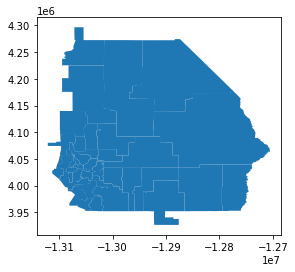

In [8]:
ie.plot()
# nice

In [9]:
ie.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World - 85°S to 85°N
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## Plotting

In [10]:
bins_list = [0.10, 0.25, 0.5499, 0.7,]
cm = plt.cm.viridis
upc = ie['UPpct']

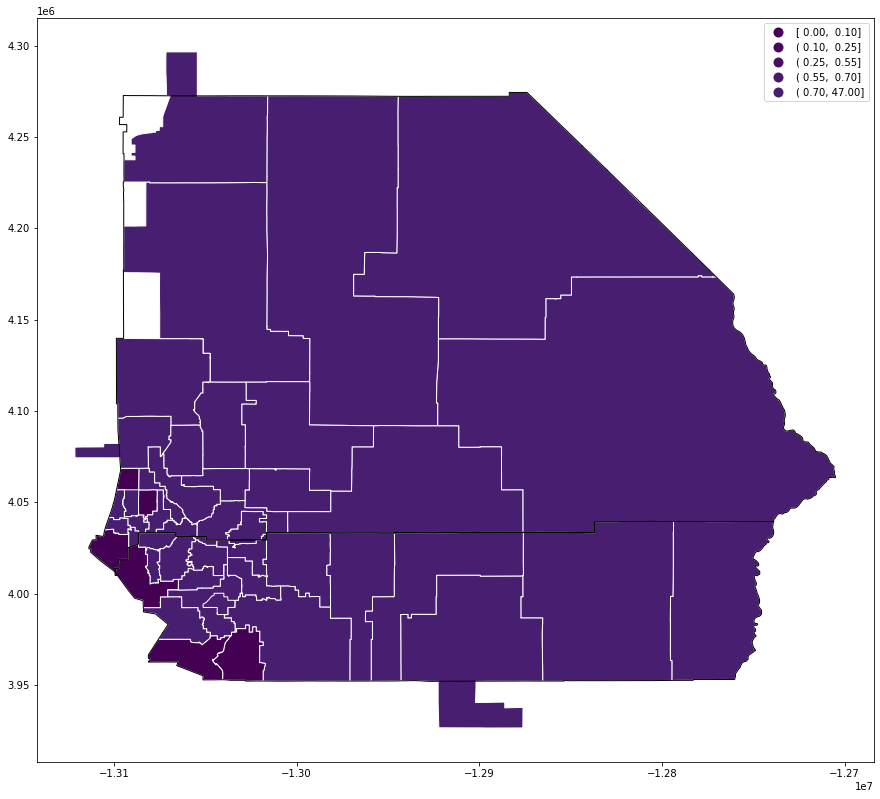

In [11]:
fig, ax = plt.subplots(figsize=(15,15))

ie.plot(
    column='concentrat',
    legend=True,
    scheme='userdefined',
    classification_kwds={'bins':bins_list},
    linewidth=1,
    edgecolor='white',
    cmap=cm,
    ax=ax
        )

# ax.set_title("Share of Socioeconomically Disadvantaged Students by District", fontsize=16)

iec.boundary.plot(facecolor='none',
                       edgecolor='black',
                       linewidth=1,
                       ax=ax)

## Geosnap

We want to use the Geosnap package to construct a `community` class for the Inland Empire and compare changes in neighborhoods over time to the distribution of disadvantaged school districts and student outcomes in the region.

See the [geosnap user guide](https://spatialucr.github.io/geosnap-guide/content/01_getting_started.html)

In [12]:
import geosnap
from geosnap import datasets
from geosnap import Community
import tobler

Loading manifest: 100%|██████████| 2/2 [00:00<00:00, 2002.53entries/s]
C:\Users\fiend\Anaconda2\envs\capstone\lib\site-packages\geosnap\_data.py:123: UserWarning: Unable to locate local census data. Streaming instead.
If you plan to use census data repeatedly you can store it locally with the io.store_census function for better performance
  "Unable to locate local census data. Streaming instead.\n"
Loading manifest: 100%|██████████| 2/2 [00:00<?, ?entries/s]


In [13]:
# geosnap.datasets.msas()[datasets.msas().name.str.startswith("Riverside")]
# queries the database for the right geoid for the I.E.

In [14]:
# state census data

#ca = Community.from_census(state_fips="06")
#ca = ca.gdf
#ca['point'] = ca.representative_point()
#ca.set_geometry('point')
#ca.crs=
#ca = ca.loc[ca['year'] == 2010]
#ca[ca.intersects(ie.unary_union)]

##  from ltdb

In [15]:
riverside = Community.from_ltdb(msa_fips="40140")

C:\Users\fiend\Anaconda2\envs\capstone\lib\site-packages\geosnap\_data.py:364: UserWarning: streaming remote data. Use `geosnap.io.store_census() to store the data locally for better performance
  warn('streaming remote data. Use `geosnap.io.store_census() to store the data locally for better performance')
C:\Users\fiend\Anaconda2\envs\capstone\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [16]:
riverside = riverside.gdf

In [17]:
riverside.crs=4326

In [18]:
riverside = riverside.to_crs(3857)

In [19]:
riverside = riverside.loc[riverside['year'] == 2010]

In [20]:
riverside.geometry

3288    POLYGON ((-13064163.782 4027935.847, -13063926...
3289    POLYGON ((-13066134.026 4028914.684, -13064163...
3290    POLYGON ((-13066713.221 4029763.077, -13066280...
3291    POLYGON ((-13071985.535 4024570.714, -13071337...
3292    POLYGON ((-13067582.181 4026210.533, -13067401...
                              ...                        
4105    POLYGON ((-13016171.724 4220904.163, -13016237...
4106    POLYGON ((-12858375.566 4098826.559, -12854748...
4107    POLYGON ((-12740532.642 4039517.418, -12736728...
4108    POLYGON ((-13054166.736 4041822.375, -13053837...
4109    POLYGON ((-13069000.614 4109815.668, -13068900...
Name: geometry, Length: 822, dtype: geometry

In [21]:
riverside['point'] = riverside.representative_point()
riverside = riverside.set_geometry('point')

In [22]:
riverside = riverside[riverside.intersects(ie.unary_union)]

use tobler to aggregate census tracts up to district geometries - arial interpretation
representative point

In [23]:
riverside.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World - 85°S to 85°N
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [24]:
ie.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World - 85°S to 85°N
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [25]:
for collumn in riverside:
    print(collumn)

geoid
n_asian_under_15
n_black_under_15
n_hispanic_under_15
n_native_under_15
n_white_under_15
n_persons_under_18
n_asian_over_60
n_black_over_60
n_hispanic_over_60
n_native_over_60
n_persons_over_60
n_white_over_60
n_asian_over_65
n_black_over_65
n_hispanic_over_65
n_native_over_65
n_white_over_65
n_persons_over_75
n_persons_over_15
n_civilians_over_16
n_civilians_over_18
n_persons_over_25
n_age_5_older
n_asian_age_distribution
n_black_age_distribution
n_hispanic_age_distribution
n_native_age_distribution
n_white_age_distribution
n_asian_persons
n_black_persons
n_chinese_persons
n_labor_force
n_civilians_16_64
n_edu_college_greater
n_cuban_pop
n_poverty_determined_asian
n_poverty_determined_black
n_total_pop_sample
n_female_over_16
n_poverty_determined_families
n_poverty_determined_hispanic
n_disabled
n_housing_units_multiunit_structures_denom
n_poverty_determined_native
n_poverty_determined_persons
n_poverty_determined_white
n_employed_over_16
n_total_families
n_foreign_born_pop
n_fe

In [26]:
ext_vars = [
            'median_household_income',
           ]
# counts

int_vars = [
            'p_asian_under_15',
            'p_black_under_15',
            'p_hispanic_under_15',
            'p_native_under_15',
            'p_white_under_15', 
            'p_persons_under_18',
           ]
# percentages

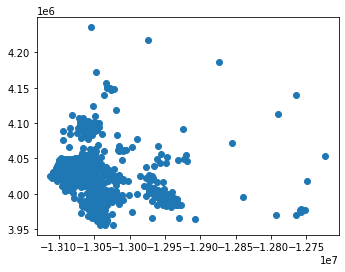

In [27]:
riverside.plot()

In [28]:
riverside = riverside.set_geometry('geometry')

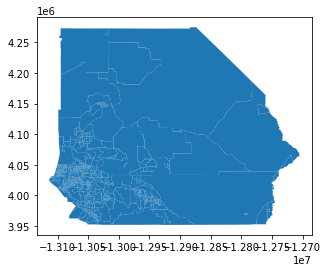

In [29]:
riverside.plot()

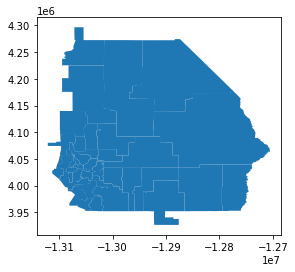

In [30]:
ie.plot()

In [31]:
results = tobler.area_weighted.area_interpolate(riverside, ie, intensive_variables=int_vars, extensive_variables=ext_vars, allocate_total=False)

C:\Users\fiend\Anaconda2\envs\capstone\lib\site-packages\tobler\util\util.py:28: UserWarning: nan values in variable: median_household_income, replacing with 0
  warn(f"nan values in variable: {column}, replacing with 0")
C:\Users\fiend\Anaconda2\envs\capstone\lib\site-packages\tobler\util\util.py:28: UserWarning: nan values in variable: p_asian_under_15, replacing with 0
  warn(f"nan values in variable: {column}, replacing with 0")
C:\Users\fiend\Anaconda2\envs\capstone\lib\site-packages\tobler\util\util.py:28: UserWarning: nan values in variable: p_black_under_15, replacing with 0
  warn(f"nan values in variable: {column}, replacing with 0")
C:\Users\fiend\Anaconda2\envs\capstone\lib\site-packages\tobler\util\util.py:28: UserWarning: nan values in variable: p_hispanic_under_15, replacing with 0
  warn(f"nan values in variable: {column}, replacing with 0")
C:\Users\fiend\Anaconda2\envs\capstone\lib\site-packages\tobler\util\util.py:28: UserWarning: nan values in variable: p_native_und

In [32]:
results.head()

,median_household_income,p_asian_under_15,p_black_under_15,p_hispanic_under_15,p_native_under_15,p_white_under_15,p_persons_under_18,geometry
0,1.536137e+06,1.912436,1.339609,13.759470,0.071609,6.904140,29.669234,"POLYGON ((-13074875.389 4024405.751, -13074875..."
1,3.974920e+05,1.085004,0.352273,10.358747,1.078993,5.085491,20.750985,"POLYGON ((-12981586.316 4033173.668, -12981586..."
2,7.970822e+05,1.825056,0.458110,7.267620,0.049385,7.346607,21.802196,"POLYGON ((-13016470.839 4009343.419, -13016483..."
3,4.212276e+06,2.191625,0.750314,9.281321,0.161334,9.199703,27.492817,"POLYGON ((-13082625.007 4023767.400, -13082624..."
4,1.863092e+04,0.000000,1.081467,11.269629,0.000000,1.795141,17.817764,"POLYGON ((-12794486.750 3952501.342, -12796234..."


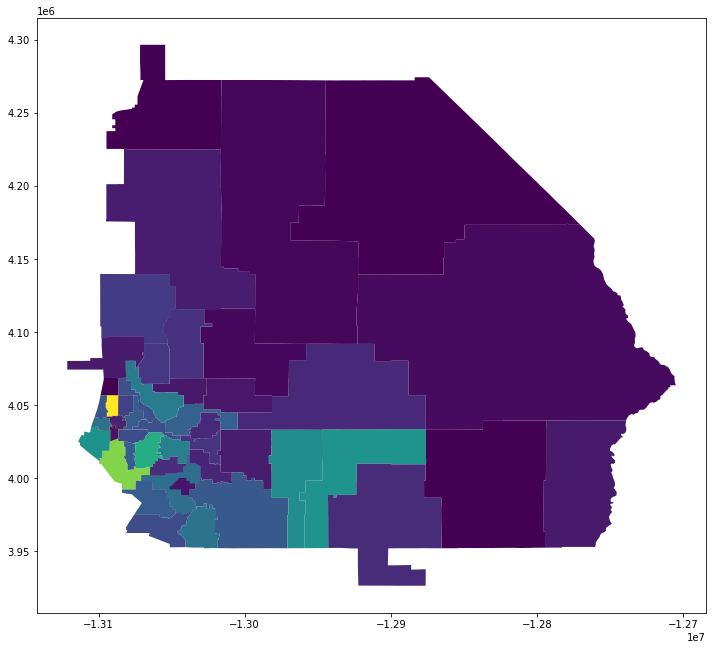

In [33]:
results.plot('median_household_income', figsize=(12, 12))

### Census household income vs CDE share of socio-economically disadvantaged students

AttributeError: 'numpy.ndarray' object has no attribute 'set_title'

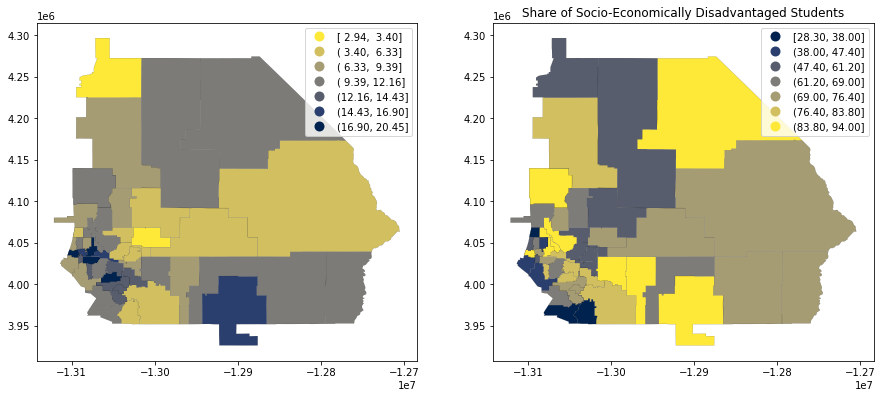

In [34]:
f, ax = plt.subplots(ncols=2, figsize=(15, 15))
plt.title('Share of Socio-Economically Disadvantaged Students')

results.plot(
    column='p_hispanic_under_15',
    legend=True,
    figsize=(15, 15),
    scheme="fisher_jenks",
    k=7,
    linewidth=.1,
    edgecolor='black',
    cmap='cividis_r',
    ax=ax[0]
        )

ie.plot(
    column='SEDpct',
    legend=True,
    figsize=(15, 15),
    scheme='fisher_jenks',
    k=7,
    linewidth=.1,
    edgecolor='black',
    cmap='cividis',
    ax=ax[1]
        )

ax.set_title('Median Household Income')

The above map could do with some investigation of the classes defined. Income is a long tailed distribution and not directly comparable to the percentaged based `UPC` variable. Additionally the bins for income be artificially inflated through the interpolation process.<br><br><br>

### Census percent black under age 15 vs CDE share of African American students

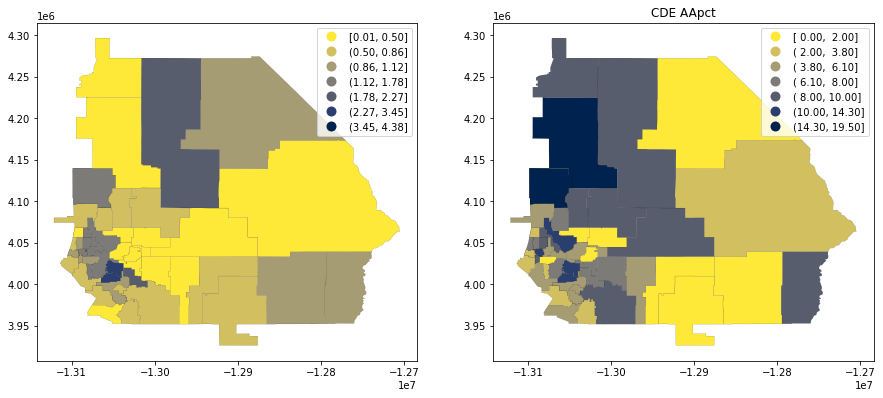

In [35]:
f, ax = plt.subplots(ncols=2, figsize=(15, 15))
plt.title('CDE AApct')

results.plot(
    column='p_black_under_15',
    legend=True,
    figsize=(15, 15),
    scheme="fisher_jenks",
    k=7,
    linewidth=.1,
    edgecolor='black',
    cmap='cividis_r',
    ax=ax[0]
        )

ie.plot(
    column='AApct',
    legend=True,
    figsize=(15, 15),
    scheme="fisher_jenks",
    k=7,
    linewidth=.1,
    edgecolor='black',
    cmap='cividis_r',
    ax=ax[1]
        )

The map on the left represents the amount of black people under age 15 as determined by the 2010 census. These values are interpolated to the school district geometries. The map on the right represents the percent of black students within each school district. <br><br><br>

### hispanic

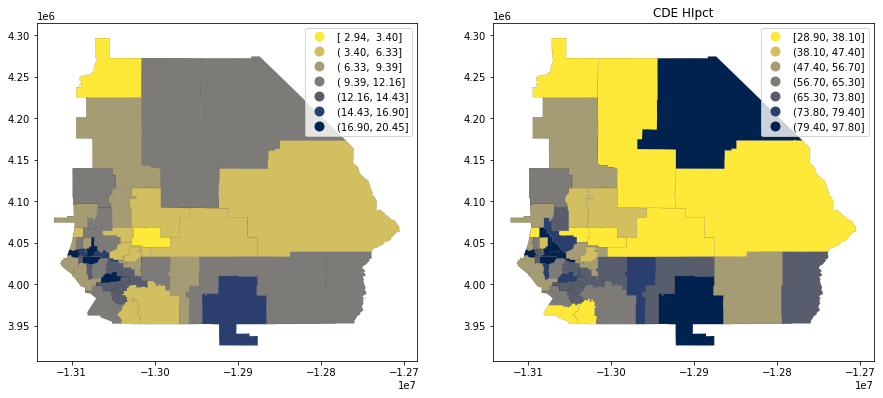

In [36]:
f, ax = plt.subplots(ncols=2, figsize=(15, 15))
plt.title('CDE HIpct')

results.plot(
    column='p_hispanic_under_15',
    legend=True,
    figsize=(15, 15),
    scheme="fisher_jenks",
    k=7,
    linewidth=.1,
    edgecolor='black',
    cmap='cividis_r',
    ax=ax[0]
        )

ie.plot(
    column='HIpct',
    legend=True,
    figsize=(15, 15),
    scheme="fisher_jenks",
    k=7,
    linewidth=.1,
    edgecolor='black',
    cmap='cividis_r',
    ax=ax[1]
        )

### white

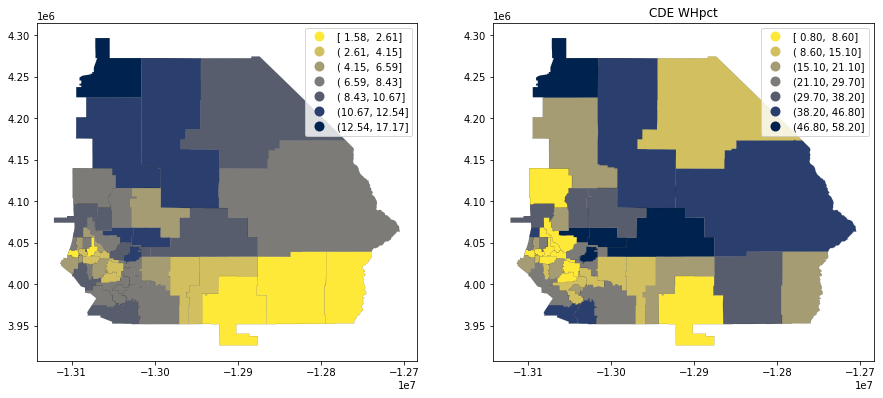

In [37]:
f, ax = plt.subplots(ncols=2, figsize=(15, 15))
plt.title('CDE WHpct')

results.plot(
    column='p_white_under_15',
    legend=True,
    figsize=(15, 15),
    scheme="fisher_jenks",
    k=7,
    linewidth=.1,
    edgecolor='black',
    cmap='cividis_r',
    ax=ax[0]
        )

ie.plot(
    column='WHpct',
    legend=True,
    figsize=(15, 15),
    scheme="fisher_jenks",
    k=7,
    linewidth=.1,
    edgecolor='black',
    cmap='cividis_r',
    ax=ax[1]
        )

### asian 

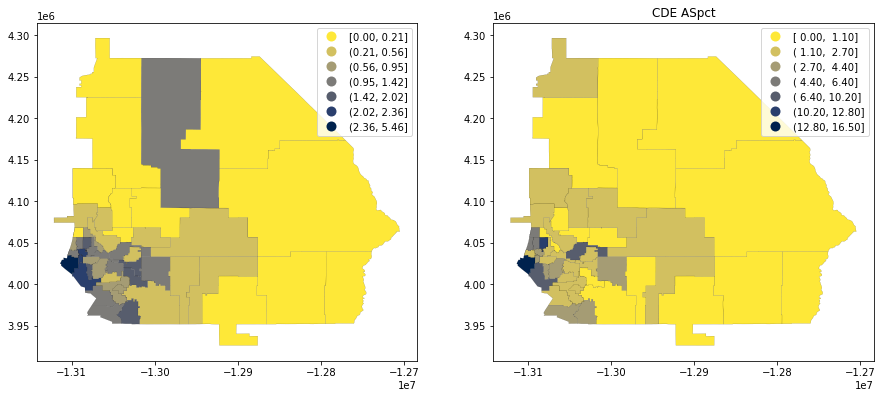

In [38]:
f, ax = plt.subplots(ncols=2, figsize=(15, 15))
plt.title('CDE ASpct')

results.plot(
    column='p_asian_under_15',
    legend=True,
    figsize=(15, 15),
    scheme="fisher_jenks",
    k=7,
    linewidth=.1,
    edgecolor='black',
    cmap='cividis_r',
    ax=ax[0]
        )

ie.plot(
    column='ASpct',
    legend=True,
    figsize=(15, 15),
    scheme="fisher_jenks",
    k=7,
    linewidth=.1,
    edgecolor='black',
    cmap='cividis_r',
    ax=ax[1]
        )

### native

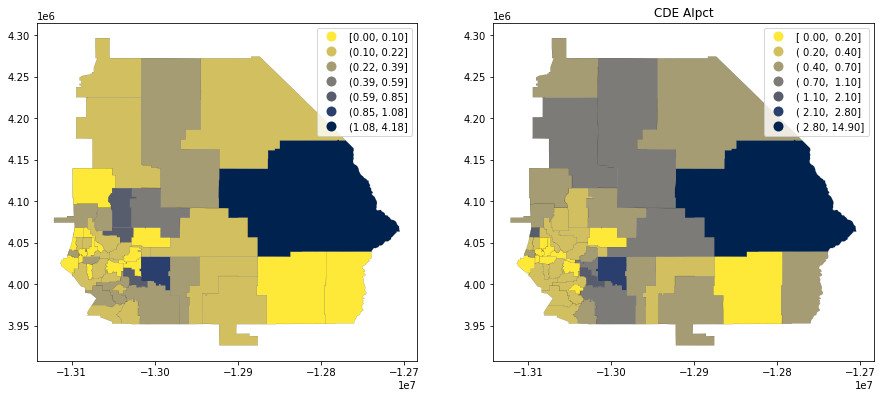

In [39]:
f, ax = plt.subplots(ncols=2, figsize=(15, 15))
plt.title('CDE AIpct')

results.plot(
    column='p_native_under_15',
    legend=True,
    figsize=(15, 15),
    scheme="fisher_jenks",
    k=7,
    linewidth=.1,
    edgecolor='black',
    cmap='cividis_r',
    ax=ax[0]
        )

ie.plot(
    column='AIpct',
    legend=True,
    figsize=(15, 15),
    scheme="fisher_jenks",
    k=7,
    linewidth=.1,
    edgecolor='black',
    cmap='cividis_r',
    ax=ax[1]
        )

This set of maps are the most closely aligned. <br><br><br>

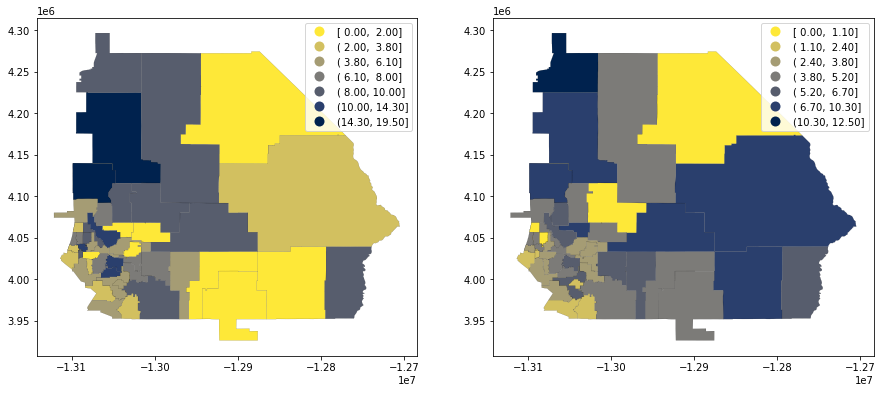

In [46]:
f, ax = plt.subplots(ncols=2, figsize=(15, 15))

ie.plot(
    column='AApct',
    legend=True,
    figsize=(15, 15),
    scheme="fisher_jenks",
    k=7,
    linewidth=.1,
    edgecolor='black',
    cmap='cividis_r',
    ax=ax[0]
        )
#percentage of black students on the left

ie.plot(
    column='SuspPct',
    legend=True,
    figsize=(15, 15),
    scheme="fisher_jenks",
    k=7,
    linewidth=.1,
    edgecolor='black',
    cmap='cividis_r',
    ax=ax[1]
        )
#suspension rates on the right